# Table of Contents

## 1. Family Ordering Habits
## 2. Family Stats
## 3. Sales Per Region
## 4. Sales Per Department

# Importing Libraries and Data

In [73]:
# importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

# import df

path = r'C:\Users\Charles Yi\04-2023 Instacart Basket Analysis\02 Data\Prepared Data'

df = pd.read_pickle(os.path.join(path, 'dep_cust_profile.pkl'))

MemoryError: 

In [2]:
df.head()

,user_id,region,Age,income,n_dependants,department_id,product_name,prices,add_to_cart_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,age_group,income_group,family_group,department
0,1,South,31,40423,3,7,Soda,9.0,1,2,8,NaN,18-44,Low income,Family,beverages
1,1,South,31,40423,3,7,Soda,9.0,1,3,7,15.0,18-44,Low income,Family,beverages
2,1,South,31,40423,3,7,Soda,9.0,1,3,12,21.0,18-44,Low income,Family,beverages
3,1,South,31,40423,3,7,Soda,9.0,1,4,7,29.0,18-44,Low income,Family,beverages
4,1,South,31,40423,3,7,Soda,9.0,1,4,15,28.0,18-44,Low income,Family,beverages


# 1. Family Ordering Habits

In [74]:
# ordering habits

family_ord_habits = df.groupby('family_group').agg({'prices' : 'mean', 'orders_day_of_week' : 'mean', 'order_hour_of_day' : 'mean', 'days_since_prior_order' : 'mean'})

In [75]:
family_ord_habits

,prices,orders_day_of_week,order_hour_of_day,days_since_prior_order
family_group,,,,
Family,7.791334,2.740545,13.422517,11.111834
Single,7.789975,2.733830,13.433048,11.080805


In [76]:
# rounding

family_ord_habits = family_ord_habits.round(2)

family_ord_habits

,prices,orders_day_of_week,order_hour_of_day,days_since_prior_order
family_group,,,,
Family,7.79,2.74,13.42,11.11
Single,7.79,2.73,13.43,11.08


In [77]:
# resetting index

family_ord_habits_index = family_ord_habits.reset_index()

family_ord_habits_index

,family_group,prices,orders_day_of_week,order_hour_of_day,days_since_prior_order
0,Family,7.79,2.74,13.42,11.11
1,Single,7.79,2.73,13.43,11.08


In [78]:
# renaming column

family_ord_habits_index = family_ord_habits_index.rename(columns = {'prices' : 'avg_prices', 'orders_day_of_week' : 'avg_orders_day_of_week', 'order_hour_of_day' : 'avg_order_hour_of_day', 'days_since_prior_order' : 'avg_days_since_prior_order'})

In [79]:
family_ord_habits_index

,family_group,avg_prices,avg_orders_day_of_week,avg_order_hour_of_day,avg_days_since_prior_order
0,Family,7.79,2.74,13.42,11.11
1,Single,7.79,2.73,13.43,11.08


In [80]:
family_ord_habits_index.to_clipboard()

# 2. Family Stats

In [36]:
# number of customers, orders, and sum of prices per family group

family_stats = df.groupby('family_group').agg({'user_id' : ['nunique', 'count'], 'prices' : 'sum'})

family_stats

user_id                 prices
             nunique     count          sum
family_group                               
Family        154607  24307356  189356344.5
Single         51602   8097503   63069776.1

In [37]:
# indexing family_stats

family_stats_index = family_stats.reset_index()

family_stats_index

family_group user_id                 prices
               nunique     count          sum
0       Family  154607  24307356  189356344.5
1       Single   51602   8097503   63069776.1

In [38]:
# setting family_group index

family_stats_reindex = family_stats_index.set_index('family_group')

family_stats_reindex

user_id                 prices
             nunique     count          sum
family_group                               
Family        154607  24307356  189356344.5
Single         51602   8097503   63069776.1

In [39]:
# joining columns to make it a single column

family_stats_reindex.columns = family_stats_reindex.columns.map(''.join)

family_stats_reindex

,user_idnunique,user_idcount,pricessum
family_group,,,
Family,154607,24307356,189356344.5
Single,51602,8097503,63069776.1


In [40]:
# reindexing

family_stats_reindex = family_stats_reindex.reset_index()

In [41]:
family_stats_reindex

,family_group,user_idnunique,user_idcount,pricessum
0,Family,154607,24307356,189356344.5
1,Single,51602,8097503,63069776.1


In [42]:
# re-ordering rows

family_stats_sort = family_stats_reindex.iloc[[1, 0]]

family_stats_sort

,family_group,user_idnunique,user_idcount,pricessum
1,Single,51602,8097503,63069776.1
0,Family,154607,24307356,189356344.5


# 2a. Pie Chart of Customers

Text(0.5, 1.0, 'Distribution of Customers')

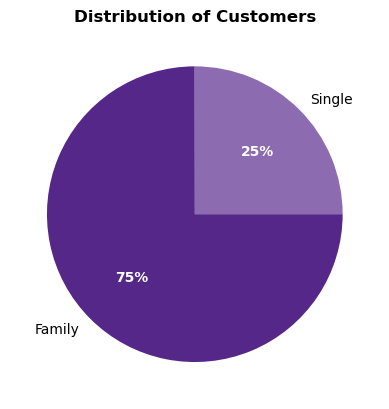

In [64]:
# plotting pie chart of number of customers

colors = ['#8C6BB1', '#542788']

values = family_stats_sort['user_idnunique']
labels = family_stats_sort['family_group']

patches, label, percentages = family_distribution_pie = plt.pie(values, labels = labels,  autopct = '%.0f%%', colors = colors)

for text in percentages:
    text.set_color('white'),
    text.set_fontweight('bold')
    
plt.title('Distribution of Customers', fontweight = 'bold')

# 2b. Sales Per Family Group

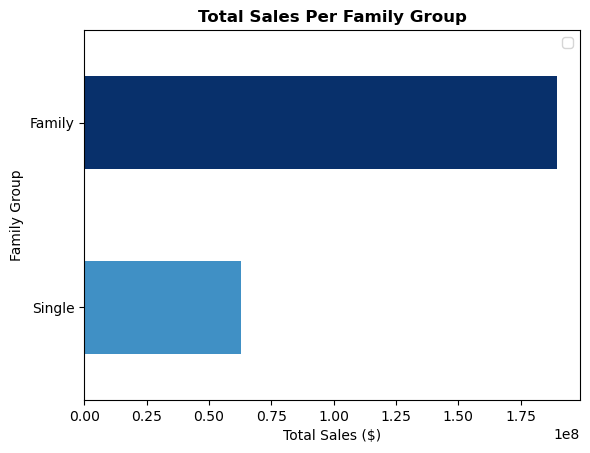

In [69]:
# plotting bar chart of prices

colors = plt.get_cmap('Blues')

family_price_bar = ax = family_stats_sort.plot.barh(x = 'family_group', y = 'pricessum', color = colors((family_stats_sort['pricessum'])/100000000))

ax.set_title('Total Sales Per Family Group', fontweight = 'bold')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Family Group')
ax.legend('')

# 2c. Orders Per Family Group

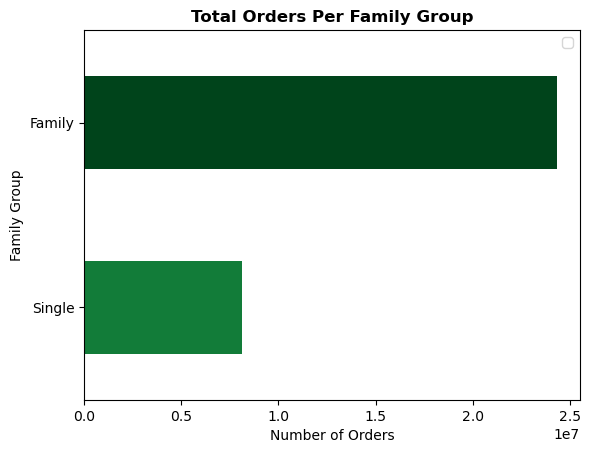

In [70]:
# plotting bar chart of orders

colors = plt.get_cmap('Greens')

family_order_bar = ax = family_stats_sort.plot.barh(x = 'family_group', y = 'user_idcount', color = colors((family_stats_sort['user_idcount'])/10000000))

ax.set_title('Total Orders Per Family Group', fontweight = 'bold')
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Family Group')
ax.legend('')

# 3. Sales Per Region

In [18]:
df.head()

,user_id,region,Age,income,n_dependants,department_id,product_name,prices,add_to_cart_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,age_group,income_group,family_group,department
0,1,South,31,40423,3,7,Soda,9.0,1,2,8,NaN,18-44,Low income,Family,beverages
1,1,South,31,40423,3,7,Soda,9.0,1,3,7,15.0,18-44,Low income,Family,beverages
2,1,South,31,40423,3,7,Soda,9.0,1,3,12,21.0,18-44,Low income,Family,beverages
3,1,South,31,40423,3,7,Soda,9.0,1,4,7,29.0,18-44,Low income,Family,beverages
4,1,South,31,40423,3,7,Soda,9.0,1,4,15,28.0,18-44,Low income,Family,beverages


In [19]:
family_region = df.groupby(['region', 'family_group']).agg({'user_id' : 'nunique', 'prices' : 'sum'})

family_region

user_id      prices
region    family_group                     
Midwest   Family          36446  44345631.5
          Single          12073  14847346.2
Northeast Family          27191  33489229.4
          Single           9197  11040876.4
South     Family          51574  63050541.9
          Single          17163  21057368.5
West      Family          39396  48470941.7
          Single          13169  16124185.0

In [20]:
family_region_index = family_region.reset_index()

family_region_index

,region,family_group,user_id,prices
0,Midwest,Family,36446,44345631.5
1,Midwest,Single,12073,14847346.2
2,Northeast,Family,27191,33489229.4
3,Northeast,Single,9197,11040876.4
4,South,Family,51574,63050541.9
5,South,Single,17163,21057368.5
6,West,Family,39396,48470941.7
7,West,Single,13169,16124185.0


In [21]:
# pivot

family_region_pivot = family_region_index.pivot(index = 'region', columns = 'family_group', values = 'prices')

family_region_pivot

family_group,Family,Single
region,,
Midwest,44345631.5,14847346.2
Northeast,33489229.4,11040876.4
South,63050541.9,21057368.5
West,48470941.7,16124185.0


In [22]:
# sorting pivot by family

family_region_pivot = family_region_pivot.sort_values(by = 'Family', ascending = True)

family_region_pivot

family_group,Family,Single
region,,
Northeast,33489229.4,11040876.4
Midwest,44345631.5,14847346.2
West,48470941.7,16124185.0
South,63050541.9,21057368.5


In [23]:
# changing column order

family_region_pivot = family_region_pivot[['Single', 'Family']]

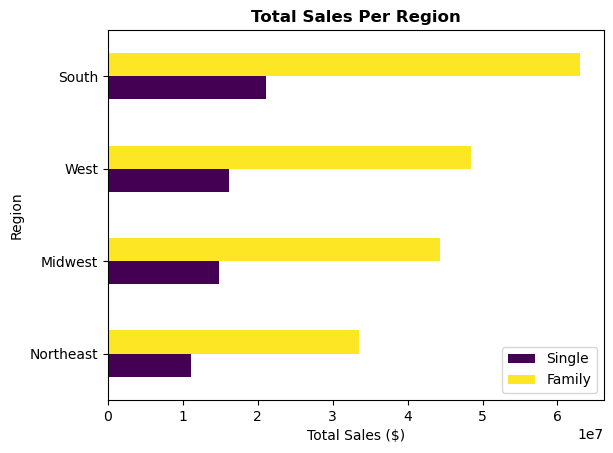

In [71]:
# creating bar chart of sum of purchaces

color = plt.get_cmap('viridis', 2)

family_region_bar = ax = family_region_pivot.plot.barh(color = color(range(2)))

ax.set_title('Total Sales Per Region', fontweight = 'bold')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Region')
ax.legend(title = '')

In [25]:
family_region_pivot.index

Index(['Northeast', 'Midwest', 'West', 'South'], dtype='object', name='region')

# 4. Sales Per Department

In [26]:
df.head()

,user_id,region,Age,income,n_dependants,department_id,product_name,prices,add_to_cart_order,orders_day_of_week,order_hour_of_day,days_since_prior_order,age_group,income_group,family_group,department
0,1,South,31,40423,3,7,Soda,9.0,1,2,8,NaN,18-44,Low income,Family,beverages
1,1,South,31,40423,3,7,Soda,9.0,1,3,7,15.0,18-44,Low income,Family,beverages
2,1,South,31,40423,3,7,Soda,9.0,1,3,12,21.0,18-44,Low income,Family,beverages
3,1,South,31,40423,3,7,Soda,9.0,1,4,7,29.0,18-44,Low income,Family,beverages
4,1,South,31,40423,3,7,Soda,9.0,1,4,15,28.0,18-44,Low income,Family,beverages


In [27]:
family_dep = df.groupby(['department', 'family_group']).agg({'prices' : 'sum'})

family_dep

prices
department      family_group            
alcohol         Family          938840.1
                Single          312814.2
babies          Family         2427621.6
                Single          809539.0
bakery          Family         6902879.1
                Single         2305146.9
beverages       Family        15471995.7
                Single         5174139.4
breakfast       Family         4240277.8
                Single         1404348.2
bulk            Family          219880.9
                Single           68767.7
canned goods    Family         6060504.1
                Single         1992627.9
dairy eggs      Family        33707874.1
                Single        11248251.2
deli            Family         6110285.7
                Single         2067066.1
dry goods pasta Family         4788492.7
                Single         1581460.9
frozen          Family        12974839.4
                Single         4314367.4
household       Family         4122850.1
                Single         1331502.6
international   Family         1548953.8
                Single          519518.9
meat seafood    Family         8720630.1
                Single         2830940.2
missing         Family          449452.4
                Single          149392.8
other           Family          189892.2
                Single           63815.8
pantry          Family        11281684.0
                Single         3738976.8
personal care   Family         2680565.6
                Single          898564.3
pets            Family          575222.9
                Single          195665.5
produce         Family        56678763.4
                Single        18982171.1
snacks          Family         9264838.8
                Single         3080699.2

In [28]:
# resetting index

family_dep_index = family_dep.reset_index()

family_dep_index

,department,family_group,prices
0,alcohol,Family,938840.1
1,alcohol,Single,312814.2
2,babies,Family,2427621.6
3,babies,Single,809539.0
4,bakery,Family,6902879.1
5,bakery,Single,2305146.9
6,beverages,Family,15471995.7
7,beverages,Single,5174139.4
8,breakfast,Family,4240277.8
9,breakfast,Single,1404348.2


In [29]:
# pivoting

family_dep_pivot = family_dep_index.pivot(index = 'department', columns = 'family_group', values = 'prices')

family_dep_pivot

family_group,Family,Single
department,,
alcohol,938840.1,312814.2
babies,2427621.6,809539.0
bakery,6902879.1,2305146.9
beverages,15471995.7,5174139.4
breakfast,4240277.8,1404348.2
bulk,219880.9,68767.7
canned goods,6060504.1,1992627.9
dairy eggs,33707874.1,11248251.2
deli,6110285.7,2067066.1


In [30]:
# sorting by prices

family_dep_pivot = family_dep_pivot.sort_values(by = 'Family', ascending = True)

family_dep_pivot

family_group,Family,Single
department,,
other,189892.2,63815.8
bulk,219880.9,68767.7
missing,449452.4,149392.8
pets,575222.9,195665.5
alcohol,938840.1,312814.2
international,1548953.8,519518.9
babies,2427621.6,809539.0
personal care,2680565.6,898564.3
household,4122850.1,1331502.6


In [31]:
# re-ordering columns

family_dep_pivot = family_dep_pivot[['Single', 'Family']]

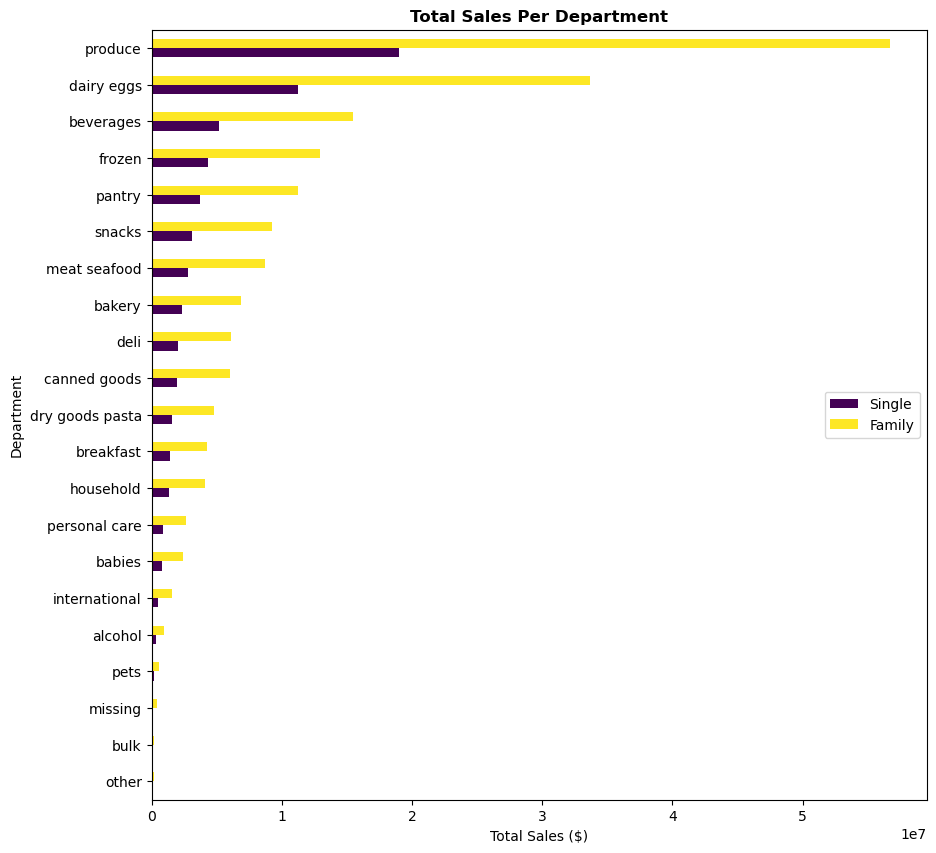

In [72]:
# creating bar chart

color = plt.get_cmap('viridis', 2)

family_dep_bar = ax = family_dep_pivot.plot.barh(color = color(range(2)), figsize = (10, 10))

ax.set_title('Total Sales Per Department', fontweight = 'bold')
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Department')
ax.legend(title = '', loc = 'center right')